In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib notebook
from matplotlib import pyplot

### Sampling rate

In [4]:
sampling_rate = '100L'

In [147]:
rolling_window_size = 300

In [5]:
##TODO: accept an input directory and process all the files 

In [6]:
raw_acc_file = 'raw_acc.txt'

In [7]:
raw_obd_file = 'raw_obd.txt'

### Reference file

In [8]:
ref_DF =  pd.read_csv(raw_obd_file)

In [9]:
ref_variable = 'timestamp' # variable of obd file

### Processing

In [10]:
acc_DF = pd.read_csv(raw_acc_file)

In [11]:
obd_DF = pd.read_csv(raw_obd_file)

In [12]:
acc_DF.head(5)

,timestamp,sys_time,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
0,0.0,1508975971982,2605508272423122,9.662998,0.517148,-0.612916
1,5.0,1508975971988,2605508277444997,9.691729,0.402226,-0.641646
2,9.0,1508975971993,2605508282402810,9.624691,0.191536,-0.536301
3,15.0,1508975971998,2605508287426247,9.634268,-0.019154,-0.296881
4,19.0,1508975972002,2605508292415310,9.749189,-0.114922,0.076614


In [13]:
obd_DF.head(5)

,timestamp,RPM,Speed,Consumption_Rate,AirFuelRatio,ThrottlePosition,MassAirFlow,FuelType,FuelLevel,FuelTrim,...,AirIntakeTemperature,AmbientAirTemperature,EngineCoolantTemperature,FuelPressure,DistanceMIL,DistanceSinceCCC,EquivalentRatio,IgnitionMonitor,ModuleVoltage,PendingTroubleCodes
0,1508975975440,1667RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1508975976257,1652RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1508975976834,1646RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1508975977029,1663RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1508975977207,1660RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
start_time = int(ref_DF[ref_variable].head(1))

In [15]:
start_time

1508975975440

In [16]:
end_time = int(ref_DF[ref_variable].tail(1))

In [17]:
end_time

1508976453224

### Sync start and end time

In [18]:
#TODO: repeat for all other files

In [19]:
acc_DF = acc_DF.loc[(acc_DF['sys_time'] >= start_time) & (acc_DF['sys_time'] <= end_time)]

In [20]:
acc_DF.head(5)

,timestamp,sys_time,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
692,3460.0,1508975975445,2605511732459060,9.720459,0.210690,0.287304
693,3465.0,1508975975448,2605511737440310,9.710882,0.296881,0.392649
694,3470.0,1508975975453,2605511742429372,9.662998,0.373495,0.220267
695,3474.0,1508975975458,2605511747419997,9.548077,0.363919,0.306458
696,3479.0,1508975975462,2605511752409060,9.356541,0.335188,0.325611


### Change the default time stamp to 0

In [21]:
acc_DF['sys_time'] = acc_DF['sys_time'] - start_time

In [22]:
obd_DF['timestamp'] = obd_DF['timestamp'] - start_time

In [23]:
acc_DF.head(5)

,timestamp,sys_time,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
692,3460.0,5,2605511732459060,9.720459,0.210690,0.287304
693,3465.0,8,2605511737440310,9.710882,0.296881,0.392649
694,3470.0,13,2605511742429372,9.662998,0.373495,0.220267
695,3474.0,18,2605511747419997,9.548077,0.363919,0.306458
696,3479.0,22,2605511752409060,9.356541,0.335188,0.325611


In [24]:
obd_DF.head(5)

,timestamp,RPM,Speed,Consumption_Rate,AirFuelRatio,ThrottlePosition,MassAirFlow,FuelType,FuelLevel,FuelTrim,...,AirIntakeTemperature,AmbientAirTemperature,EngineCoolantTemperature,FuelPressure,DistanceMIL,DistanceSinceCCC,EquivalentRatio,IgnitionMonitor,ModuleVoltage,PendingTroubleCodes
0,0,1667RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,817,1652RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1394,1646RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1589,1663RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1767,1660RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert timestamp to Epoch for sampling

In [25]:
acc_DF['sys_time'] = pd.to_datetime(acc_DF['sys_time'], unit='ms')

In [26]:
obd_DF['timestamp'] = pd.to_datetime(obd_DF['timestamp'], unit='ms')

In [27]:
acc_DF.head(5)

,timestamp,sys_time,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
692,3460.0,1970-01-01 00:00:00.005,2605511732459060,9.720459,0.210690,0.287304
693,3465.0,1970-01-01 00:00:00.008,2605511737440310,9.710882,0.296881,0.392649
694,3470.0,1970-01-01 00:00:00.013,2605511742429372,9.662998,0.373495,0.220267
695,3474.0,1970-01-01 00:00:00.018,2605511747419997,9.548077,0.363919,0.306458
696,3479.0,1970-01-01 00:00:00.022,2605511752409060,9.356541,0.335188,0.325611


In [28]:
obd_DF.head(5)

,timestamp,RPM,Speed,Consumption_Rate,AirFuelRatio,ThrottlePosition,MassAirFlow,FuelType,FuelLevel,FuelTrim,...,AirIntakeTemperature,AmbientAirTemperature,EngineCoolantTemperature,FuelPressure,DistanceMIL,DistanceSinceCCC,EquivalentRatio,IgnitionMonitor,ModuleVoltage,PendingTroubleCodes
0,1970-01-01 00:00:00.000,1667RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-01 00:00:00.817,1652RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-01 00:00:01.394,1646RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-01 00:00:01.589,1663RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-01 00:00:01.767,1660RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Perform resampling 

In [29]:
###TODO: Verify resampling

In [30]:
len(acc_DF.index)

95557

In [31]:
acc_DF = acc_DF.resample(sampling_rate, on='sys_time').mean()

In [32]:
acc_DF.to_csv("new.txt")

In [33]:
acc_DF1 = pd.read_csv("new.txt")

In [34]:
acc_DF1.head(5)

,sys_time,timestamp,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
0,1970-01-01 00:00:00.000,3502.111111,2.605512e+15,9.646505,0.234632,0.292625
1,1970-01-01 00:00:00.100,3602.136364,2.605512e+15,9.721330,0.211560,0.406144
2,1970-01-01 00:00:00.200,3707.250000,2.605512e+15,9.596918,0.334231,0.332794
3,1970-01-01 00:00:00.300,3807.050000,2.605512e+15,9.711840,0.196325,0.238462
4,1970-01-01 00:00:00.400,3907.150000,2.605512e+15,9.683588,0.181002,0.179565


In [35]:
len(acc_DF.index)

4778

In [36]:
acc_DF = acc_DF.dropna()

In [37]:
len(acc_DF.index)

4778

In [38]:
acc_DF.head(5)

,timestamp,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
sys_time,,,,,
1970-01-01 00:00:00.000,3502.111111,2.605512e+15,9.646505,0.234632,0.292625
1970-01-01 00:00:00.100,3602.136364,2.605512e+15,9.721330,0.211560,0.406144
1970-01-01 00:00:00.200,3707.250000,2.605512e+15,9.596918,0.334231,0.332794
1970-01-01 00:00:00.300,3807.050000,2.605512e+15,9.711840,0.196325,0.238462
1970-01-01 00:00:00.400,3907.150000,2.605512e+15,9.683588,0.181002,0.179565


In [39]:
len(obd_DF.index)

4384

In [40]:
obd_DF1 = obd_DF.dropna(thresh=1, axis='columns')

In [41]:
obd_DF1.head(5)

,timestamp,RPM,Speed
0,1970-01-01 00:00:00.000,1667RPM,0km/h
1,1970-01-01 00:00:00.817,1652RPM,0km/h
2,1970-01-01 00:00:01.394,1646RPM,0km/h
3,1970-01-01 00:00:01.589,1663RPM,0km/h
4,1970-01-01 00:00:01.767,1660RPM,0km/h


In [42]:
obd_DF1['RPM'] = obd_DF['RPM'].str.strip("RPM").astype('int64')

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
obd_DF1['Speed'] = obd_DF['Speed'].str.strip("km/h").astype('int64')

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
obd_DF1.head(5)

,timestamp,RPM,Speed
0,1970-01-01 00:00:00.000,1667,0
1,1970-01-01 00:00:00.817,1652,0
2,1970-01-01 00:00:01.394,1646,0
3,1970-01-01 00:00:01.589,1663,0
4,1970-01-01 00:00:01.767,1660,0


In [45]:
obd_DF1 = obd_DF1.rename(index=str,columns = {"timestamp":"sys_time"})

In [46]:
obd_DF1 = obd_DF1.resample(sampling_rate, on='sys_time').sum()

In [47]:
obd_DF1 = obd_DF1.dropna()

In [48]:
obd_DF1.head(5)

,RPM,Speed
sys_time,,
1970-01-01 00:00:00.000,1667.0,0.0
1970-01-01 00:00:00.800,1652.0,0.0
1970-01-01 00:00:01.300,1646.0,0.0
1970-01-01 00:00:01.500,1663.0,0.0
1970-01-01 00:00:01.700,1660.0,0.0


In [49]:
len(obd_DF1.index)

4345

In [50]:
pyplot.figure(figsize=(20,100))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
obd_DF1.plot()

<IPython.core.display.Javascript object>

In [52]:
pyplot.show()

In [53]:
acc_DF = acc_DF.astype('float64')

In [54]:
acc_DF.head(5)

,timestamp,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
sys_time,,,,,
1970-01-01 00:00:00.000,3502.111111,2.605512e+15,9.646505,0.234632,0.292625
1970-01-01 00:00:00.100,3602.136364,2.605512e+15,9.721330,0.211560,0.406144
1970-01-01 00:00:00.200,3707.250000,2.605512e+15,9.596918,0.334231,0.332794
1970-01-01 00:00:00.300,3807.050000,2.605512e+15,9.711840,0.196325,0.238462
1970-01-01 00:00:00.400,3907.150000,2.605512e+15,9.683588,0.181002,0.179565


In [55]:
acc_DF1 = acc_DF.dropna()

In [56]:
acc_DF1.head(5)

,timestamp,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
sys_time,,,,,
1970-01-01 00:00:00.000,3502.111111,2.605512e+15,9.646505,0.234632,0.292625
1970-01-01 00:00:00.100,3602.136364,2.605512e+15,9.721330,0.211560,0.406144
1970-01-01 00:00:00.200,3707.250000,2.605512e+15,9.596918,0.334231,0.332794
1970-01-01 00:00:00.300,3807.050000,2.605512e+15,9.711840,0.196325,0.238462
1970-01-01 00:00:00.400,3907.150000,2.605512e+15,9.683588,0.181002,0.179565


In [57]:
acc_DF1 = acc_DF.drop(['abs_timestamp', 'timestamp'],axis = 1)

In [58]:
obd_DF1.head(5)

,RPM,Speed
sys_time,,
1970-01-01 00:00:00.000,1667.0,0.0
1970-01-01 00:00:00.800,1652.0,0.0
1970-01-01 00:00:01.300,1646.0,0.0
1970-01-01 00:00:01.500,1663.0,0.0
1970-01-01 00:00:01.700,1660.0,0.0


In [59]:
acc_DF1.to_csv("acc_DF1.txt")

acc_DF1 = pd.read_csv("acc_DF1.txt")
obd_DF1.to_csv("obd_DF1.txt")

obd_DF1 = pd.read_csv("obd_DF1.txt")

In [60]:
acc_DF1.head()

,sys_time,raw_x_acc,raw_y_acc,raw_z_acc
0,1970-01-01 00:00:00.000,9.646505,0.234632,0.292625
1,1970-01-01 00:00:00.100,9.721330,0.211560,0.406144
2,1970-01-01 00:00:00.200,9.596918,0.334231,0.332794
3,1970-01-01 00:00:00.300,9.711840,0.196325,0.238462
4,1970-01-01 00:00:00.400,9.683588,0.181002,0.179565


In [61]:
import math

In [62]:
acc_DF1['acc'] = ((acc_DF1['raw_x_acc'] ** 2) + (acc_DF1['raw_y_acc']**2) + (acc_DF1['raw_z_acc']**2)) * (0.25)

In [63]:
acc_DF1['acc'] = np.sqrt(acc_DF1['acc'])

In [64]:
acc_DF1.tail()

,sys_time,raw_x_acc,raw_y_acc,raw_z_acc,acc
4773,1970-01-01 00:07:57.300,9.687419,-0.223618,0.794396,4.861254
4774,1970-01-01 00:07:57.400,9.688377,-0.188184,0.820732,4.862449
4775,1970-01-01 00:07:57.500,9.692207,-0.188184,0.819775,4.864317
4776,1970-01-01 00:07:57.600,9.681673,-0.194409,0.812113,4.858809
4777,1970-01-01 00:07:57.700,9.674265,-0.198860,0.824732,4.855696


In [65]:
acc_DF2 = acc_DF1.merge(obd_DF1,how = 'left').drop(['RPM','raw_x_acc','raw_y_acc','raw_z_acc'],axis = 1)

In [66]:
acc_DF3 = acc_DF1.merge(obd_DF1,how = 'left').drop(['RPM','acc'],axis = 1)

In [159]:
acc_DF5 = acc_DF1.merge(obd_DF1,how = 'left').drop(['acc'],axis = 1)

In [160]:
acc_DF5.head()

,sys_time,raw_x_acc,raw_y_acc,raw_z_acc,RPM,Speed
0,1970-01-01 00:00:00.000,9.646505,0.234632,0.292625,1667.0,0.0
1,1970-01-01 00:00:00.100,9.721330,0.211560,0.406144,NaN,NaN
2,1970-01-01 00:00:00.200,9.596918,0.334231,0.332794,NaN,NaN
3,1970-01-01 00:00:00.300,9.711840,0.196325,0.238462,NaN,NaN
4,1970-01-01 00:00:00.400,9.683588,0.181002,0.179565,NaN,NaN


In [161]:
acc_DF5 = acc_DF5.interpolate(method='linear')

In [68]:
acc_DF3 = acc_DF3.interpolate(method='linear')

In [148]:
acc_DF4 = acc_DF3.rolling(rolling_window_size, min_periods=1).sum()

In [157]:
acc_DF5.tail()

,sys_time,raw_x_acc,raw_y_acc,raw_z_acc,acc,RPM,Speed
4773,1970-01-01 00:07:57.300,9.687419,-0.223618,0.794396,4.861254,673.0,0.0
4774,1970-01-01 00:07:57.400,9.688377,-0.188184,0.820732,4.862449,665.0,0.0
4775,1970-01-01 00:07:57.500,9.692207,-0.188184,0.819775,4.864317,667.0,0.0
4776,1970-01-01 00:07:57.600,9.681673,-0.194409,0.812113,4.858809,662.0,0.0
4777,1970-01-01 00:07:57.700,9.674265,-0.198860,0.824732,4.855696,666.0,0.0


In [150]:
acc_DF4 = acc_DF4.set_index('sys_time')

<IPython.core.display.Javascript object>


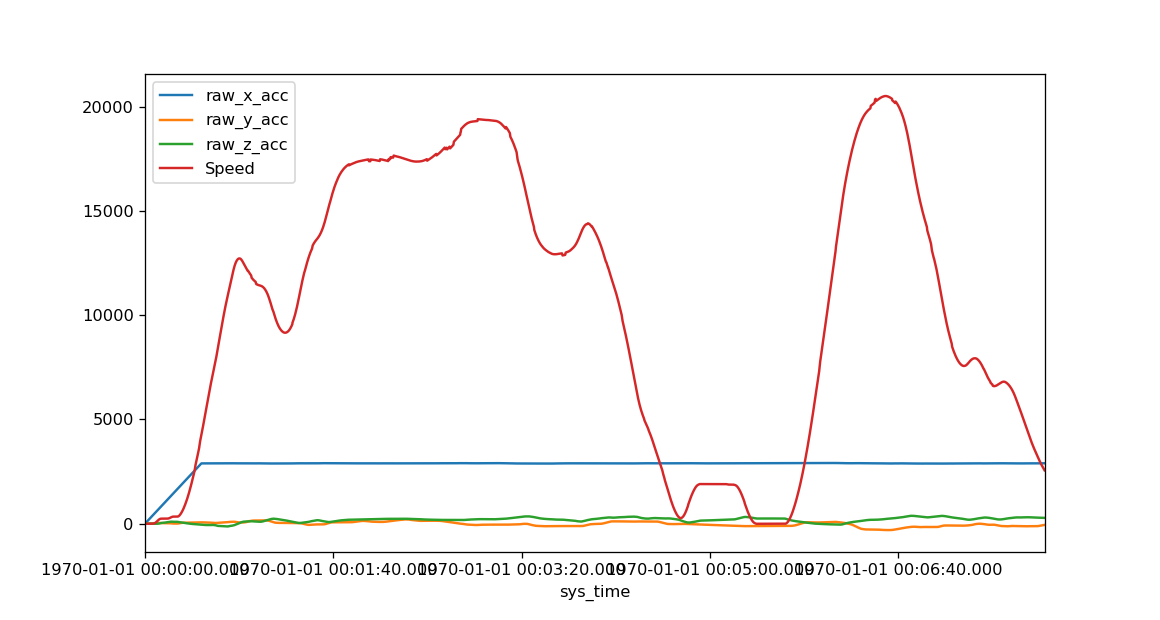

In [151]:
acc_DF4.plot()

In [119]:
from datetime import datetime
import calendar
import time

In [117]:
acc_DF3.tail()

,sys_time,raw_x_acc,raw_y_acc,raw_z_acc,Speed
4773,1970-01-01 00:07:57.300,9.687419,-0.223618,0.794396,0.0
4774,1970-01-01 00:07:57.400,9.688377,-0.188184,0.820732,0.0
4775,1970-01-01 00:07:57.500,9.692207,-0.188184,0.819775,0.0
4776,1970-01-01 00:07:57.600,9.681673,-0.194409,0.812113,0.0
4777,1970-01-01 00:07:57.700,9.674265,-0.198860,0.824732,0.0


<IPython.core.display.Javascript object>


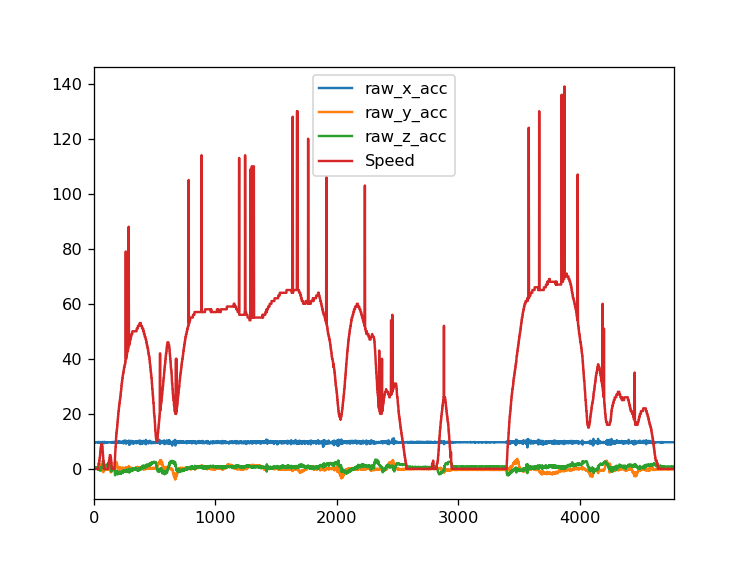

In [121]:
acc_DF3.plot()

In [76]:
from datetime import datetime
import calendar
import time

In [77]:
pattern = '%Y-%m-%d %H:%M:%S.%f'
for i in acc_DF4.index.tolist():
    x = acc_DF4.at[i,'sys_time']
    a = datetime.strptime(x, pattern)
    a = int(a.microsecond/1000)
    acc_DF4.at[i,'sys_time'] = a + (int(calendar.timegm(time.strptime(x, pattern))) * 10)

KeyError: 'sys_time'

In [ ]:
#acc_DF3.head()
acc_DF4.tail()

In [ ]:
acc_DF4 = acc_DF4.set_index('sys_time')

In [ ]:
acc_DF4.head(5)

In [ ]:
acc_DF4.plot()

In [ ]:
acc_DF4['sys_time'][0] = 0.0001
acc_DF4['obd_acc'] = acc_DF4['Speed'] / acc_DF4['sys_time']

In [ ]:
acc_DF4.head(5)

In [ ]:
acc_DF3['obd_acc'] = acc_DF3['obd_acc'].astype('float64')

In [ ]:
acc_DF4['obd_acc'] = acc_DF4['obd_acc'].astype('float64')

In [ ]:
acc_DF4['raw_z_acc'].corr(acc_DF4['obd_acc'],method='pearson')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
#plot_acf(acc_DF3['Speed'],lags=50)

In [ ]:
#plot_acf(acc_DF3['acc'],lags=50)

Creating new files

In [ ]:
obd_DF1 = obd_DF1.rename(index=str,columns = {"timestamp":"sys_time"}).head(5)

In [ ]:
obd_DF1['RPM'] = obd_DF1['RPM'].astype('str') + 'RPM'

In [ ]:
obd_DF1['Speed'] = obd_DF1['Speed'].astype('str') + 'km/h'

In [ ]:
acc_DF1.to_csv("acc.txt")

acc_DF1 = pd.read_csv("acc.txt")
obd_DF1.to_csv("obd.txt")

obd_DF1 = pd.read_csv("obd.txt")